# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [1]:
# Your code here - load the dataset
import pandas as pd
# load the dataset
data = pd.read_csv('ames.csv', index_col=0)
#turn it to a dataframe
df = pd.DataFrame(data)

Visually inspect `ames` (it's ok if you can't see all of the columns).

In [4]:
# Your code here
df.head()



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
Heating           0
HeatingQC         0
MSZoning          0
1stFlrSF          0
SalePrice         0
Length: 80, dtype: int64

Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [20]:
# Your code here - drop columns with missing data
cleaned_df = df.dropna(axis=1)

In [21]:
cleaned_df.shape

(1460, 61)

## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

In [43]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotArea        1460 non-null   int64 
 3   Street         1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   int64 
 15  OverallCond    1460 non-null   int64 
 16  YearBuilt      1460 non-null   int64 
 17  YearRemodAdd   1460 non-null   int64 
 18  RoofStyle      1460 non-null   ob

### Continuous Numeric Predictor

In [87]:
# Your code here - continuous numeric predictor
#plot the different scatter plots of continuous numeric variables vs SalePrice to see
#import pandas as pd
import pandas as pd

cols = cleaned_df.columns

continuous_columns = [ col for col in cols if  pd.api.types.is_numeric_dtype(cleaned_df[col]) and cleaned_df[col].nunique() >10]
#create a dataframe f the continuous_columns with the SalesPrice column
continuous_df = cleaned_df[continuous_columns + ['SalePrice']]
#get the correlation 
continuous_correlations = continuous_df.corr()['SalePrice']
continuous_correlations




,SalePrice,SalePrice
MSSubClass,-0.084284,-0.084284
LotArea,0.263843,0.263843
YearBuilt,0.522897,0.522897
YearRemodAdd,0.507101,0.507101
BsmtFinSF1,0.386420,0.386420
BsmtFinSF2,-0.011378,-0.011378
BsmtUnfSF,0.214479,0.214479
TotalBsmtSF,0.613581,0.613581
1stFlrSF,0.605852,0.605852
2ndFlrSF,0.319334,0.319334


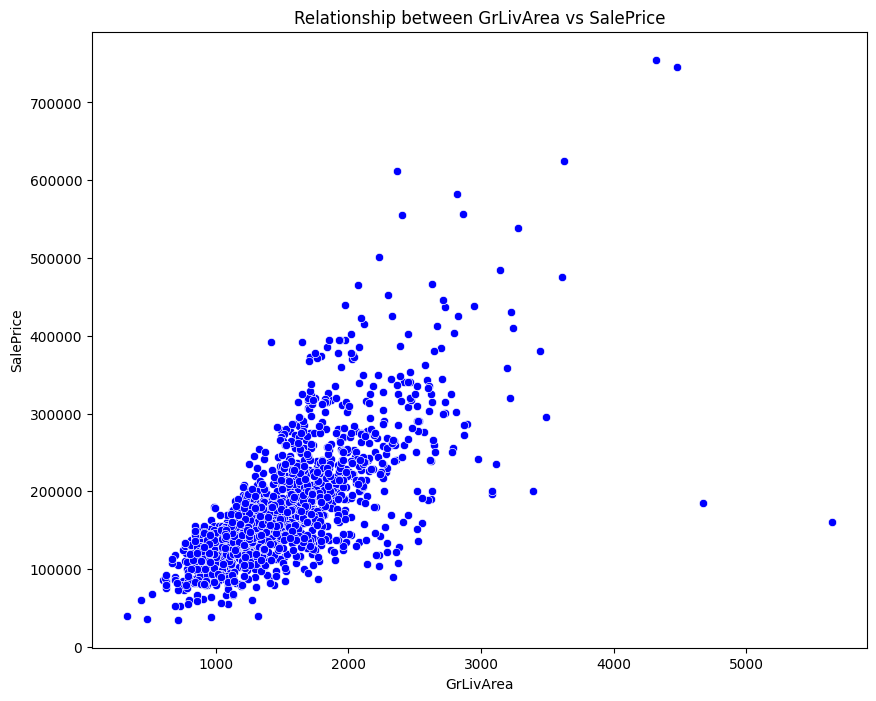

In [89]:
#GrLivArea is continuous and has the highest correlation with SalePrice
#draw a scatter plot to display therelationship 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.scatterplot(x= cleaned_df['GrLivArea'],y=cleaned_df['SalePrice'], color='b')
plt.title('Relationship between GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

### Discrete Numeric Predictor

In [94]:
# Your code here - discrete numeric predictor
# create discrete columns using pd.api.types.is_numeric_dtype

discrete_columns = [col for col in  cols if pd.api.types.is_numeric_dtype(cleaned_df[col]) and cleaned_df[col].nunique() <= 10 ]
#create a dataframe with the discrete columns and add the SalePrice column
discrete_df = cleaned_df[discrete_columns + ['SalePrice']]

#correlation between the columns and the SalePrice
discrete_correlations = discrete_df.corr()['SalePrice']
discrete_correlations


OverallQual     0.790982
OverallCond    -0.077856
BsmtFullBath    0.227122
BsmtHalfBath   -0.016844
FullBath        0.560664
HalfBath        0.284108
BedroomAbvGr    0.168213
KitchenAbvGr   -0.135907
Fireplaces      0.466929
GarageCars      0.640409
PoolArea        0.092404
YrSold         -0.028923
SalePrice       1.000000
Name: SalePrice, dtype: float64

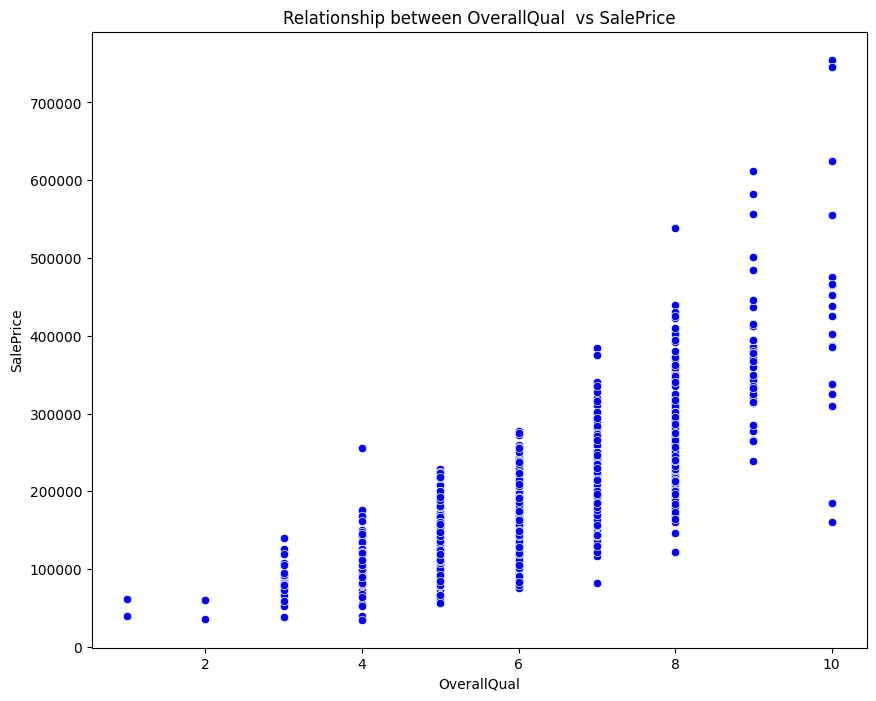

In [95]:
#based on the above analysis the OverallQual has the highest correlation thus can act as the discrete Numeric Predictor
#create a scatter plot to display the relationship
plt.figure(figsize=(10,8))
sns.scatterplot(x= cleaned_df['OverallQual'],y=cleaned_df['SalePrice'],color='b')
plt.title('Relationship between OverallQual  vs SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

In [153]:
#the numerical predictors are
continuous_numerical_pred = cleaned_df['GrLivArea']
discrete_numerical_pred = cleaned_df['OverallQual']

### String Categorical Predictor

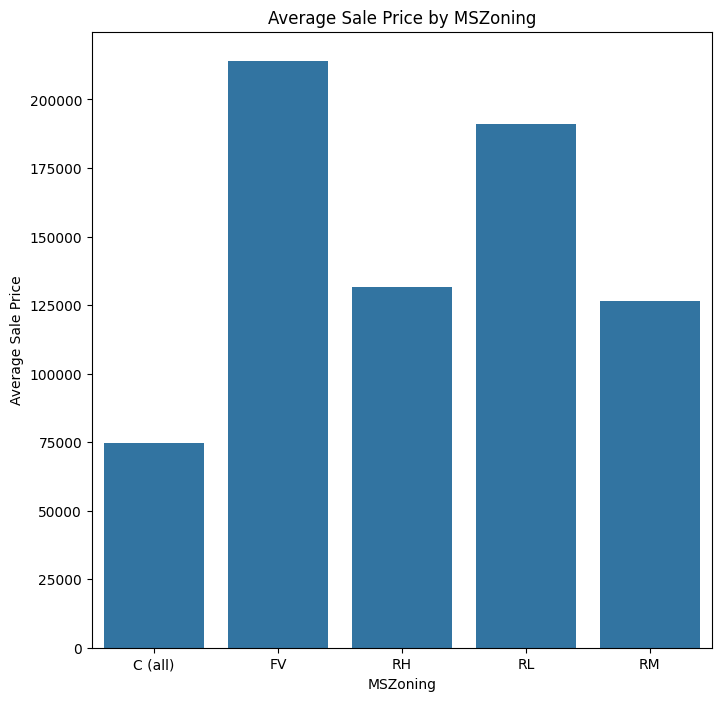

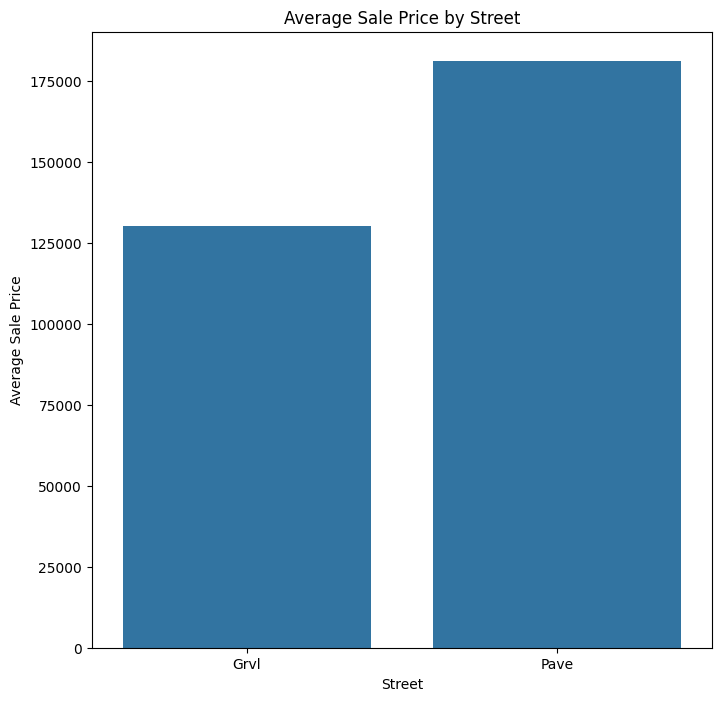

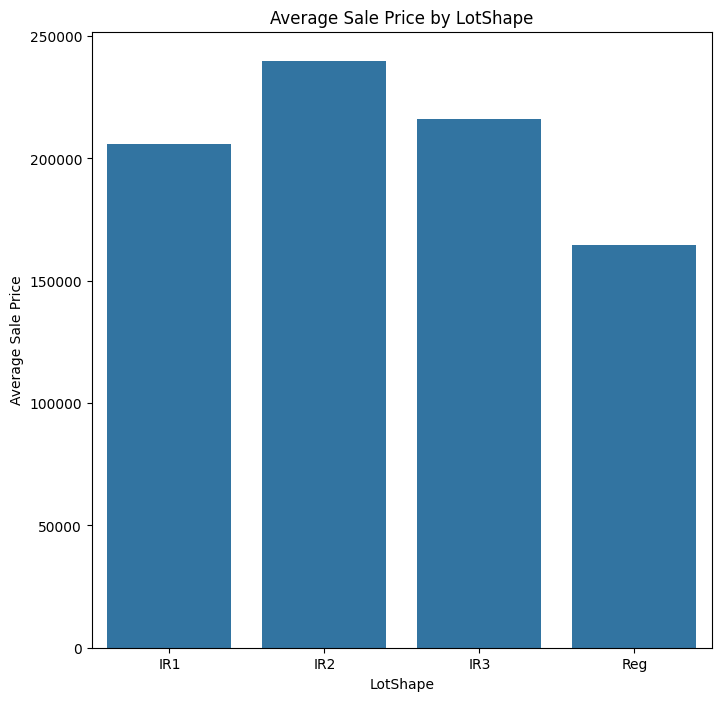

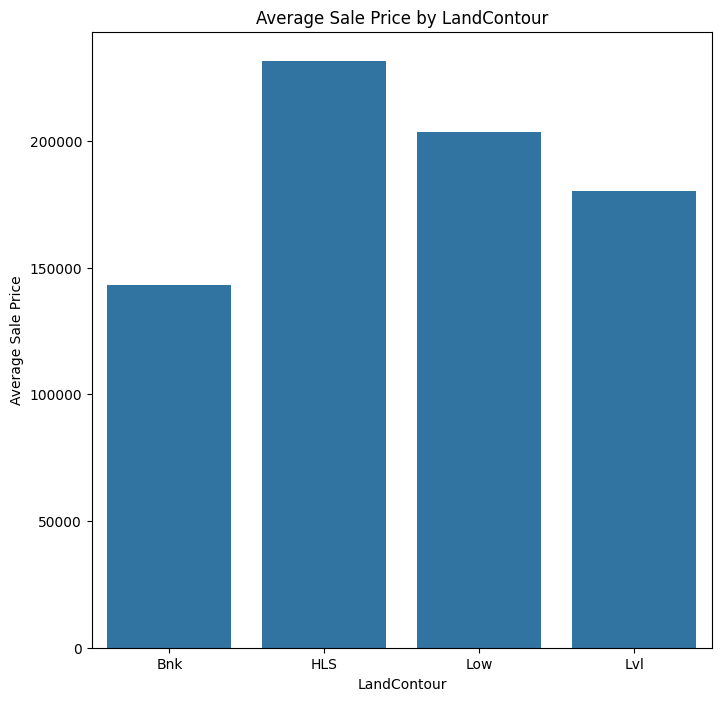

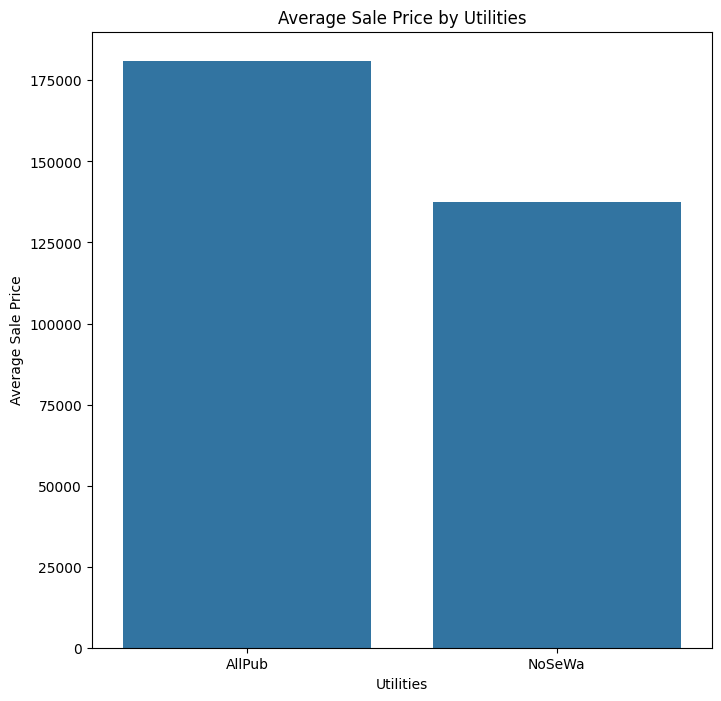

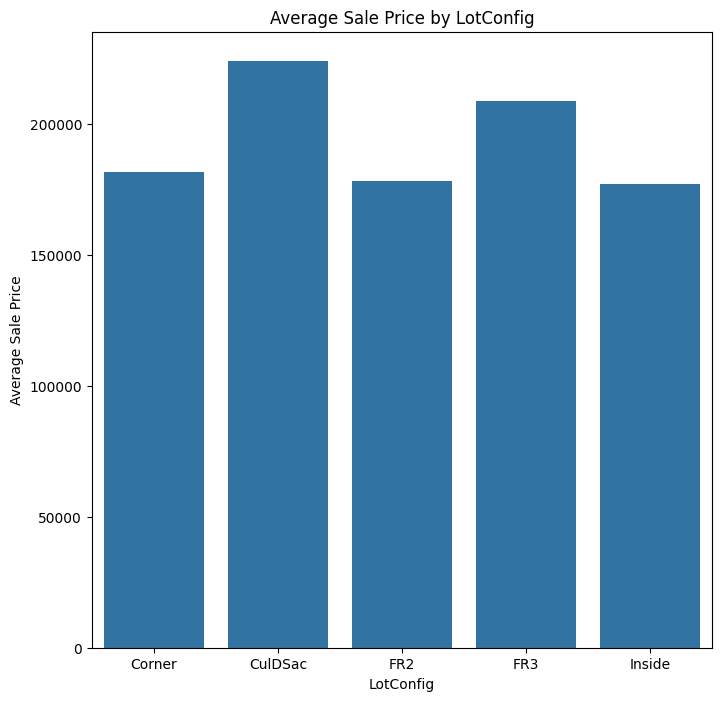

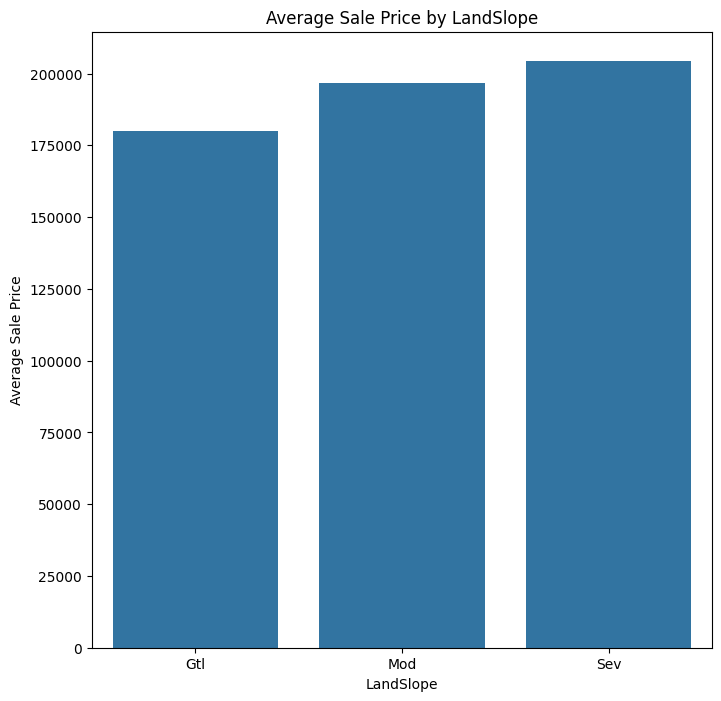

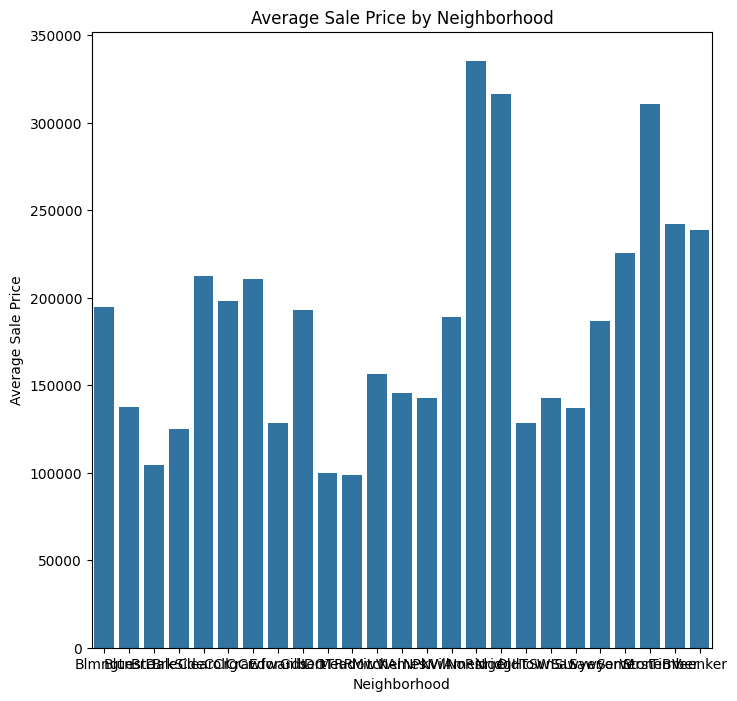

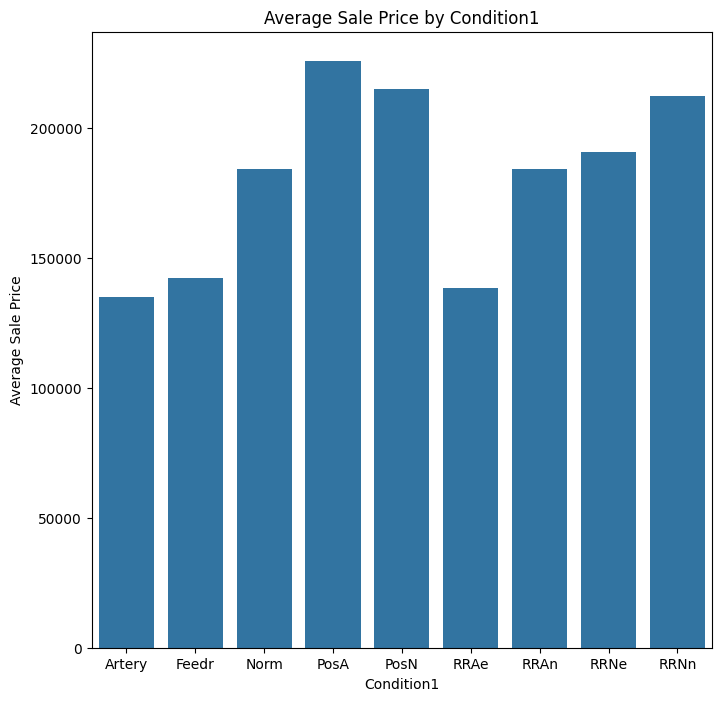

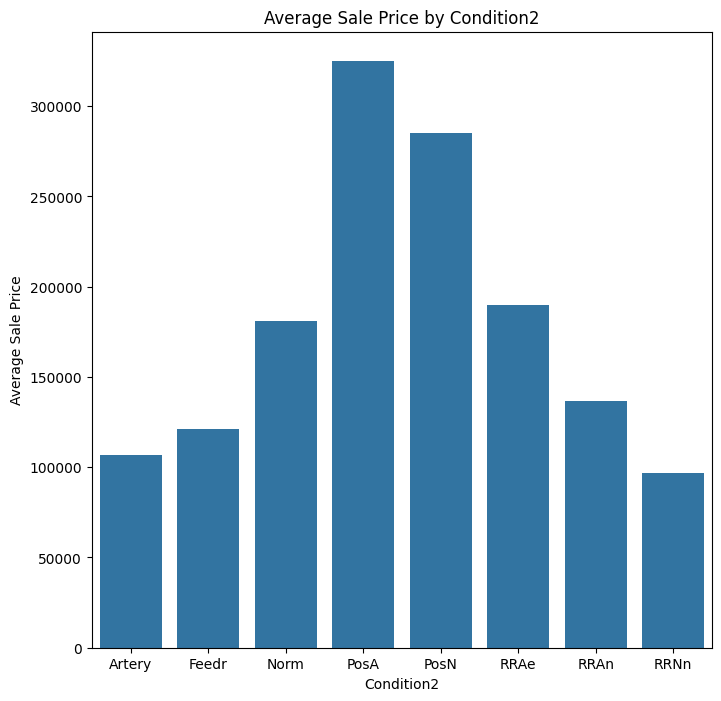

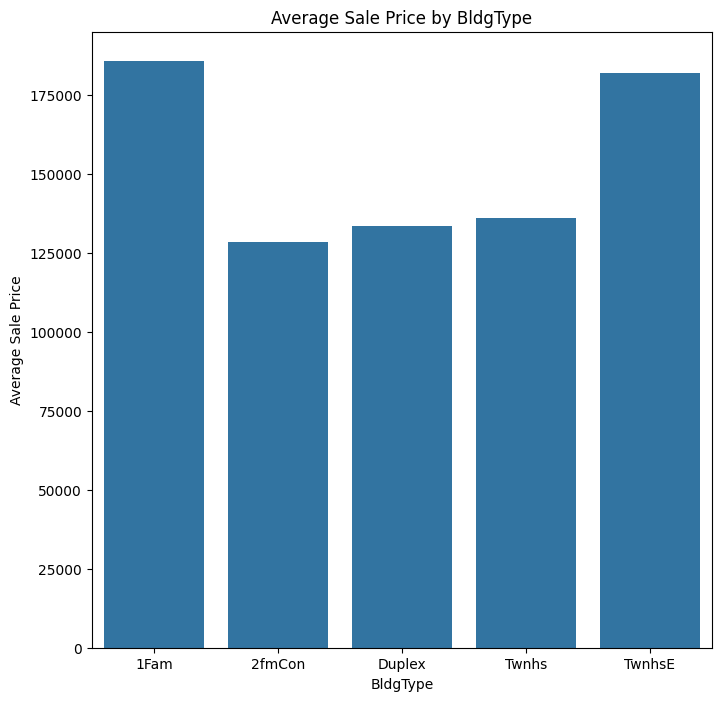

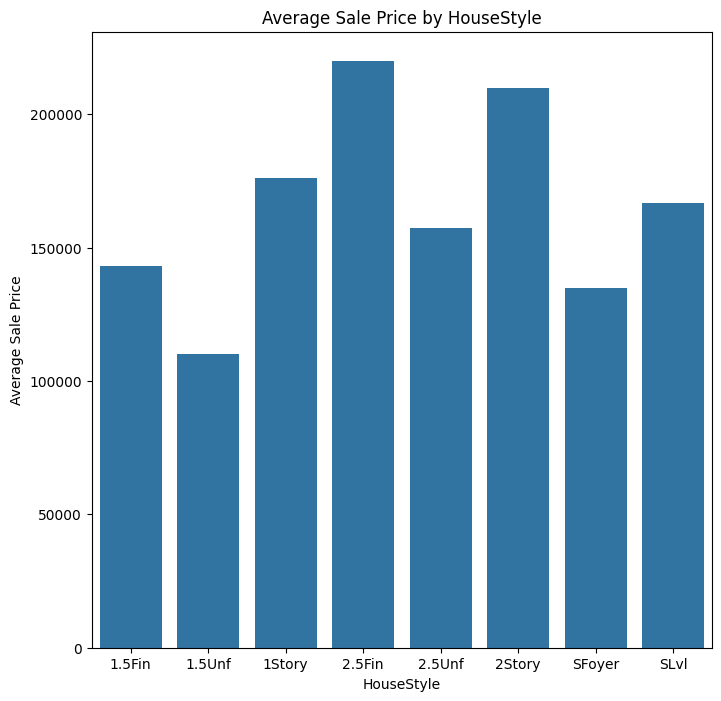

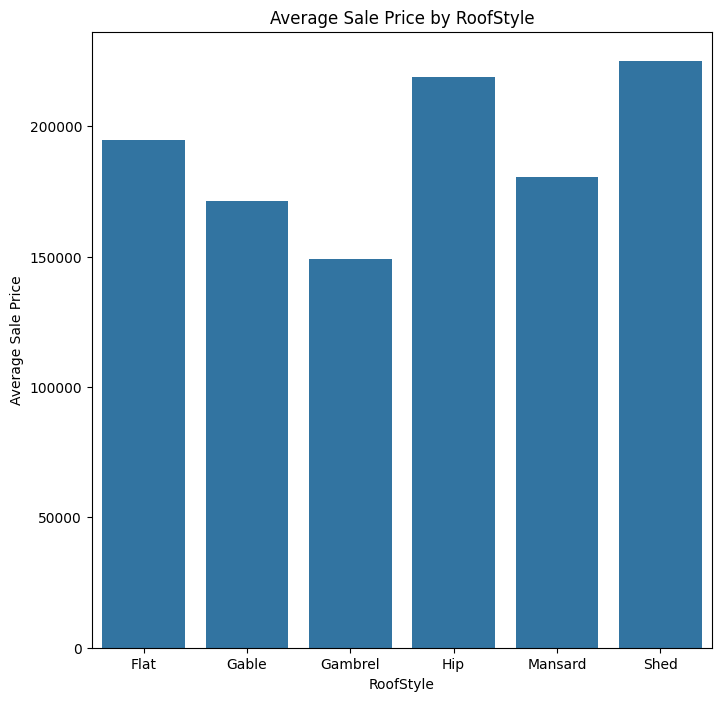

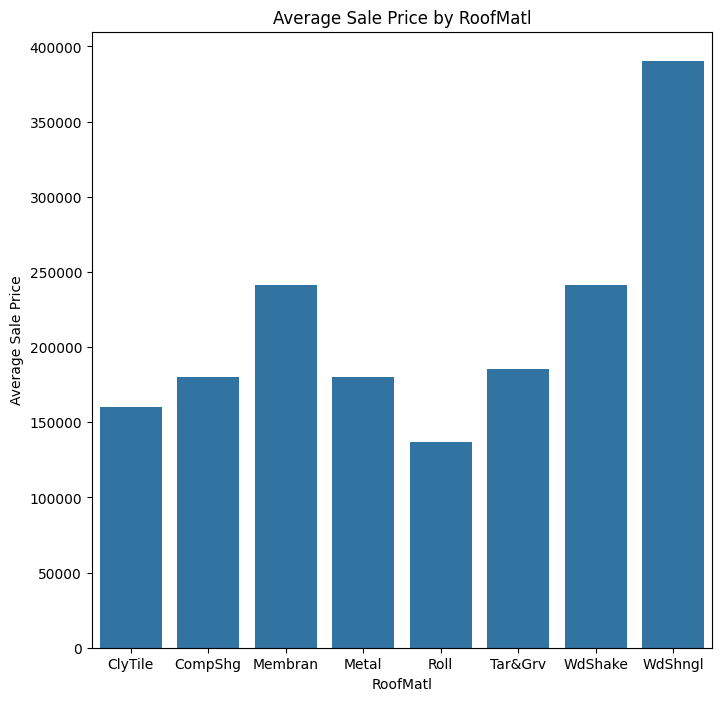

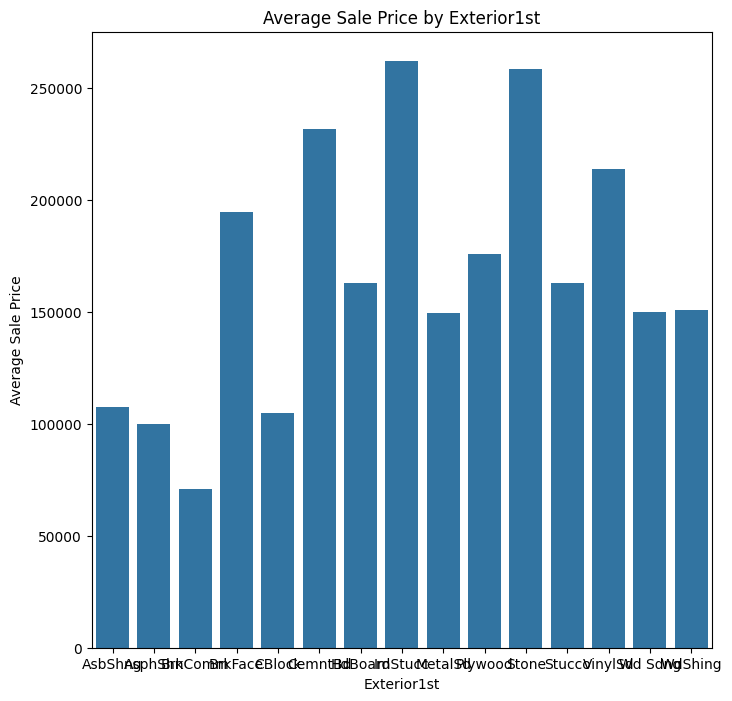

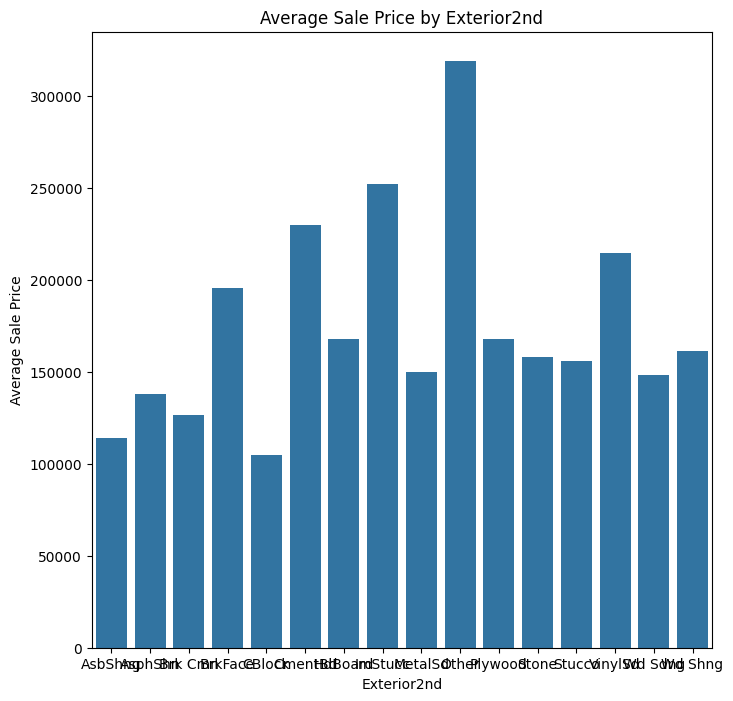

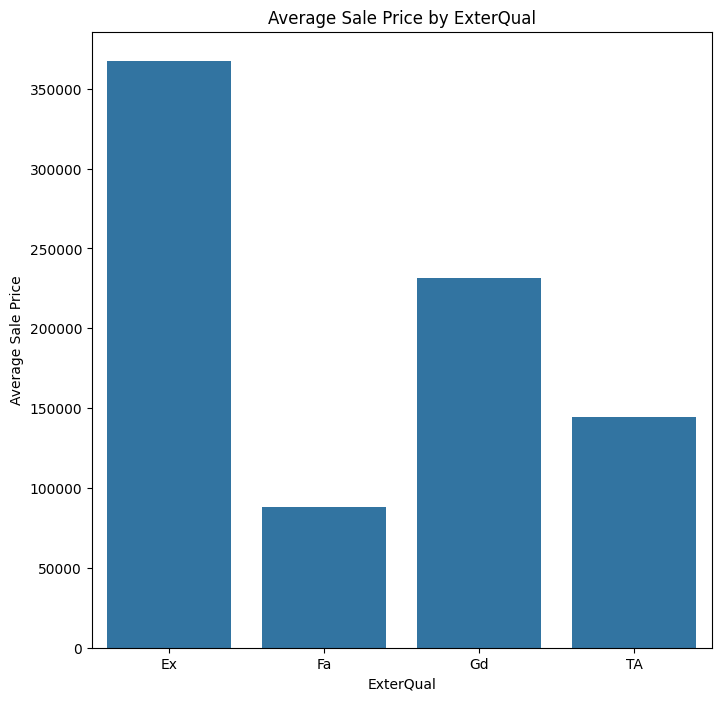

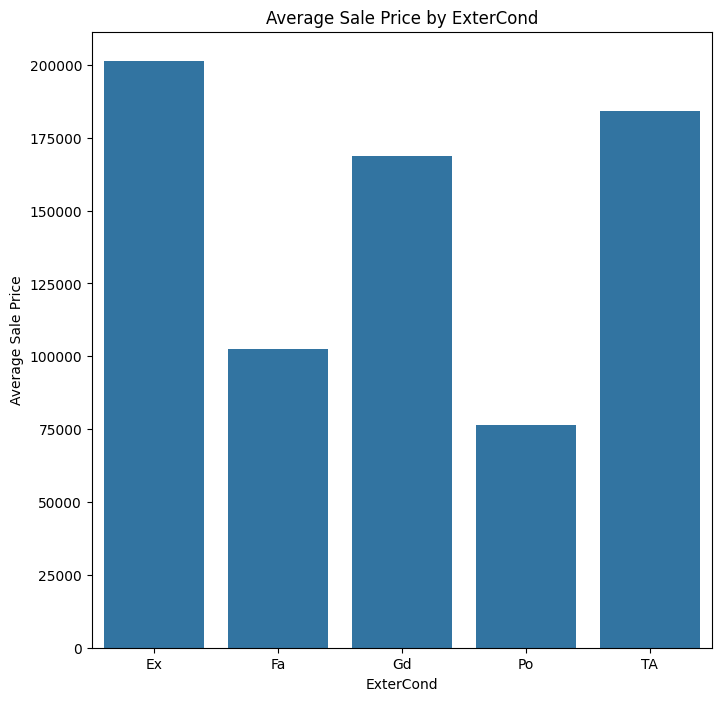

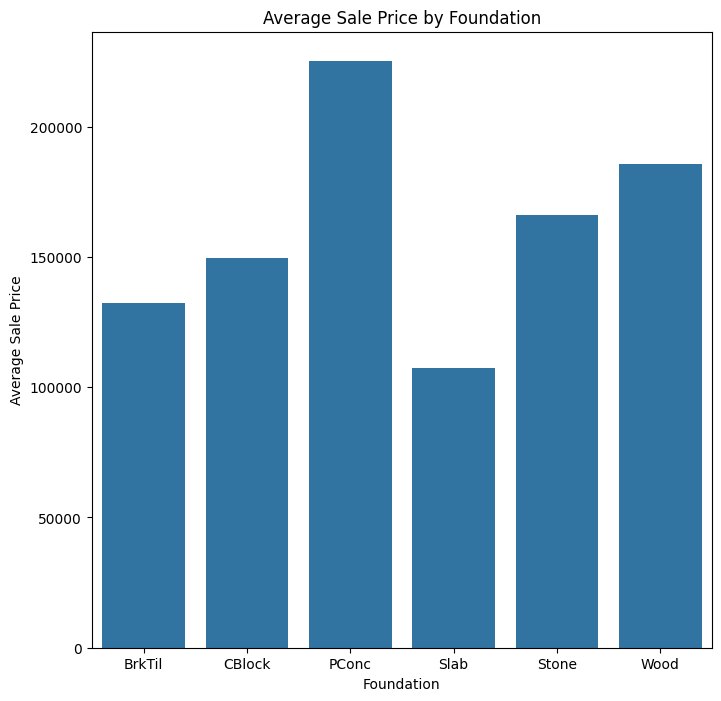

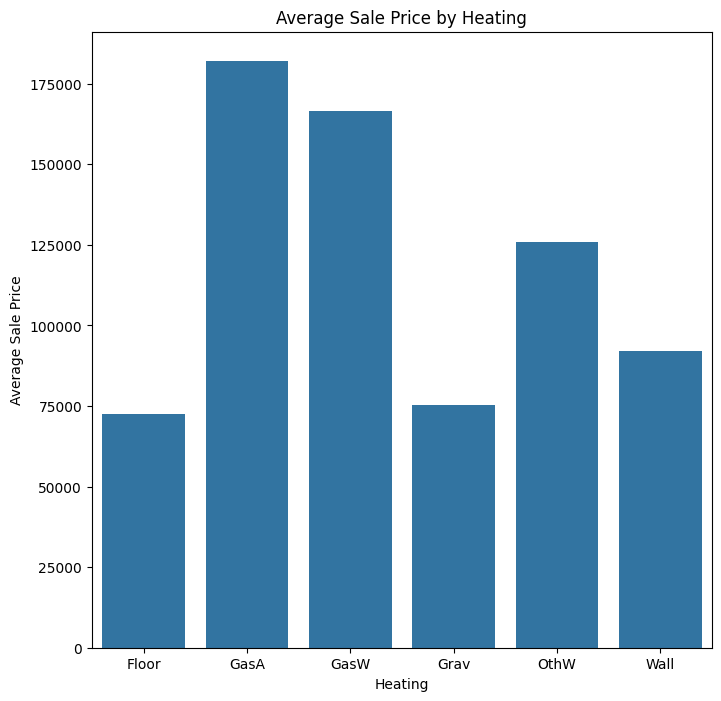

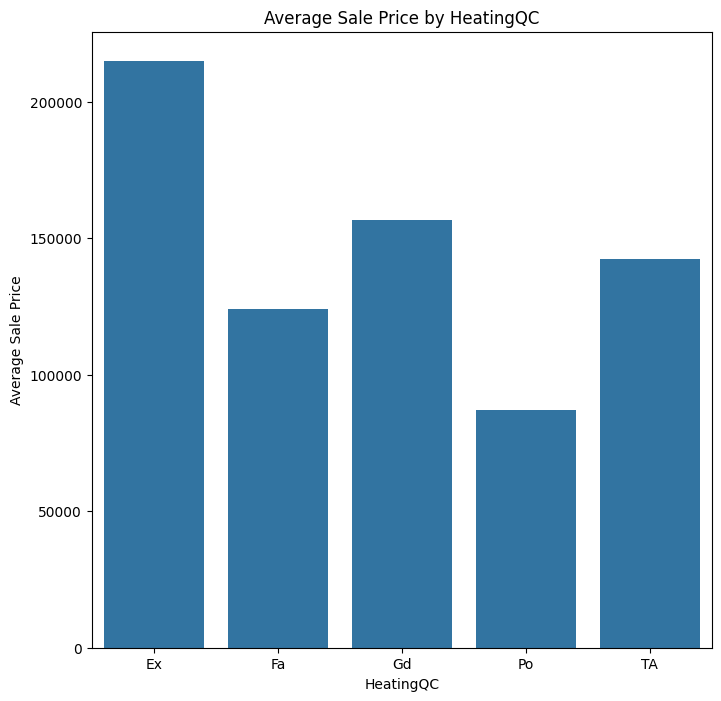

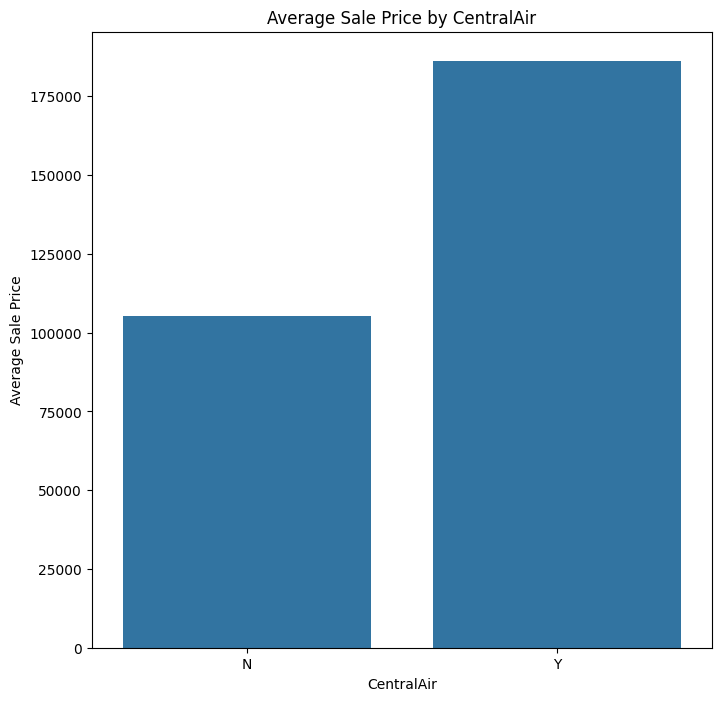

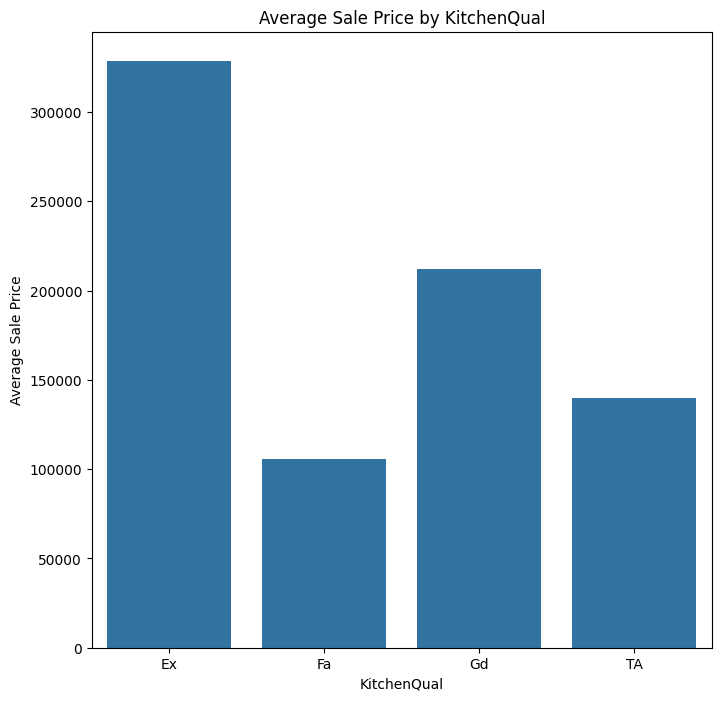

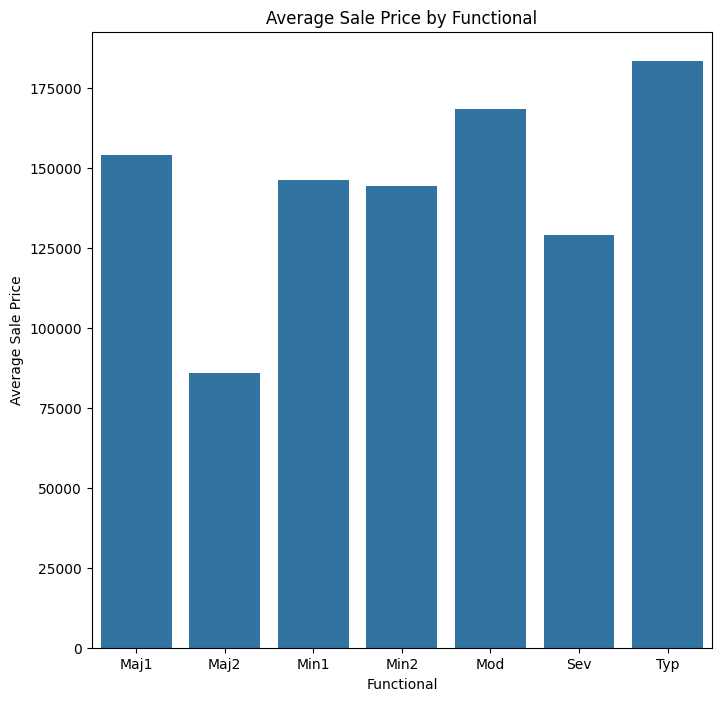

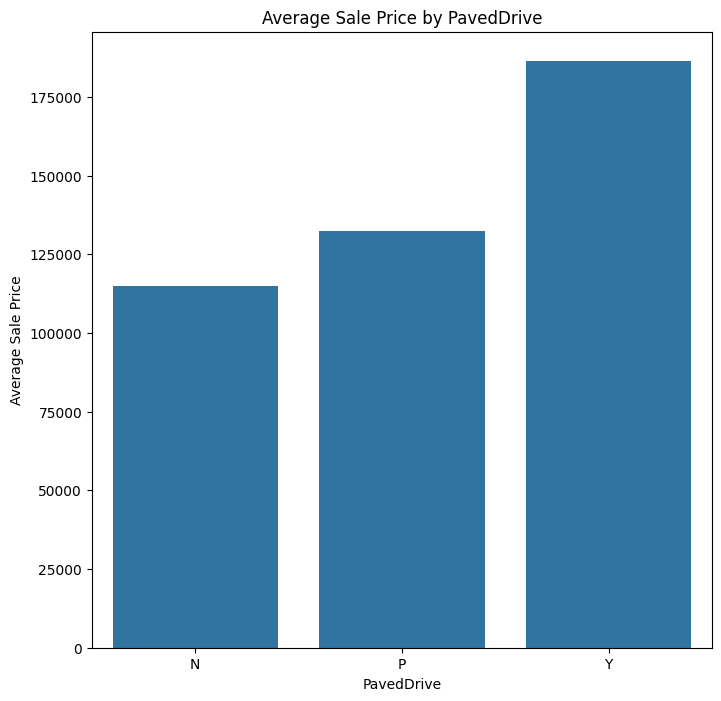

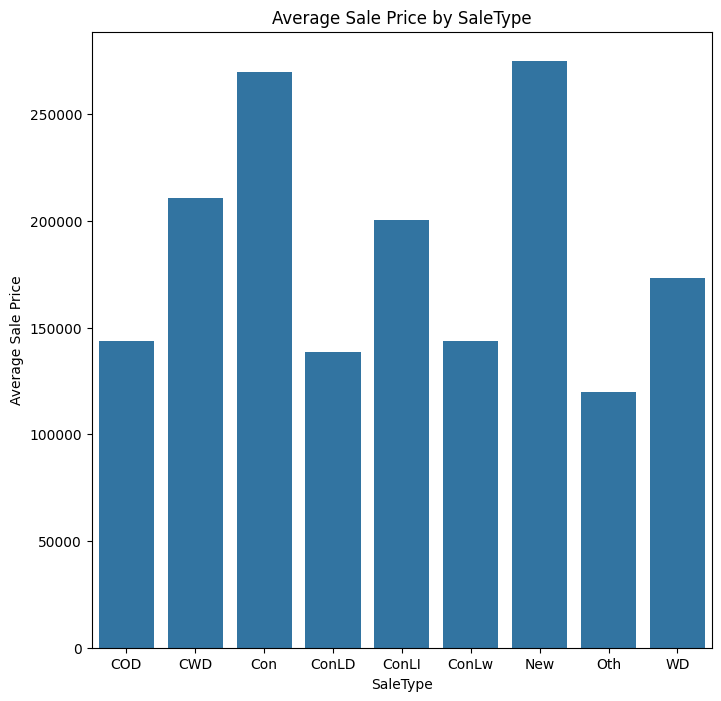

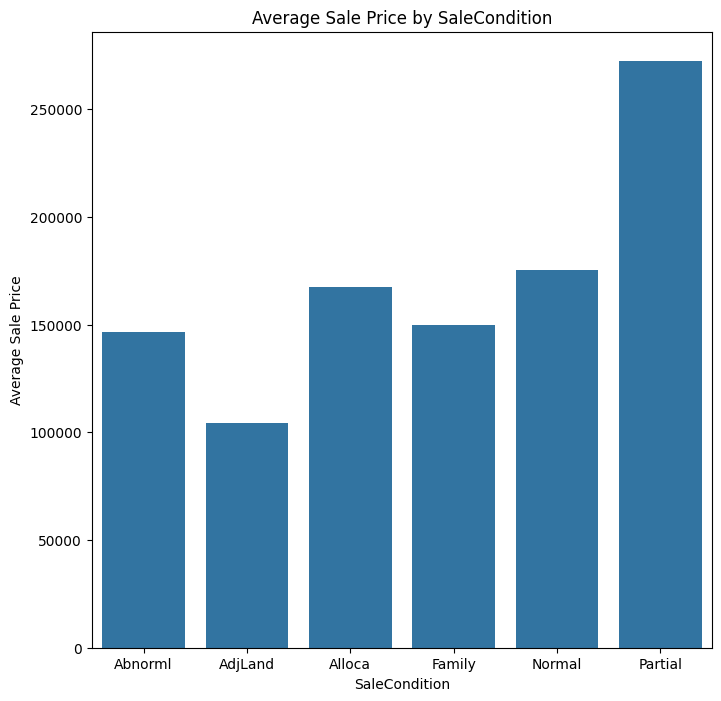

In [148]:
# Your code here - string categorical predictor

# Select columns with string (categorical) data
categorical_string = cleaned_df.select_dtypes('object').columns
#create a bar graph for each 
for index,string in enumerate(categorical_string):
    #create a bar chart
    #group the data first
    grouped_data = cleaned_df.groupby(string)['SalePrice'].mean().reset_index()
    plt.figure(figsize=(8,8))
    sns.barplot(x = string, y= 'SalePrice',data=grouped_data)
    # Set the title and labels
    plt.title(f'Average Sale Price by {string}')
    plt.xlabel(string)
    plt.ylabel('Average Sale Price') 
    # Show the plot
    plt.show()

    

In [149]:
categorical_string 

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [154]:
#string categorical predictor
string_categorical_pred= cleaned_df['LotShape']

### Discrete Categorical Predictor

In [156]:
# Your code here - discrete categorical predictor
dis_categorical =[col for col in categorical_string if df[col].nunique() <=3]
dis_categorical



['Street', 'Utilities', 'LandSlope', 'CentralAir', 'PavedDrive']

In [157]:
cleaned_df['CentralAir'].value_counts()

CentralAir
Y    1365
N      95
Name: count, dtype: int64

In [152]:
dis_categorical = cleaned_df['CentralAir']

## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [168]:
# Your code here - prepare X and y, including one-hot encoding

X = cleaned_df[['GrLivArea', 'OverallQual','LotShape','CentralAir']]
y = cleaned_df['SalePrice']

#get dummies for the X columns- string_categorical_pred and dis_categorical
X = pd.get_dummies(X, columns=(['LotShape', 'CentralAir']), dtype='int')
#drop LotShape_Reg for it to act as the reference category 
X_cleaned = X.drop(columns=(['LotShape_Reg','CentralAir_Y']))
X_cleaned


,GrLivArea,OverallQual,LotShape_IR1,LotShape_IR2,LotShape_IR3,CentralAir_N
Id,,,,,,
1,1710,7,0,0,0,0
2,1262,6,0,0,0,0
3,1786,7,1,0,0,0
4,1717,7,1,0,0,0
5,2198,8,1,0,0,0
...,...,...,...,...,...,...
1456,1647,6,0,0,0,0
1457,2073,6,0,0,0,0
1458,2340,7,0,0,0,0


In [169]:
# Your answer here - which category or categories were dropped?
"""
The LotShape_Reg and CentralAir_Y were dropped and can act as the reference categories. 
"""


'\nThe LotShape_Reg and CentralAir_Y were dropped and can act as the reference categories. \n'

In [172]:
# Your code here - build a regression model and display results
#build the regression model 
reg_model = sm.OLS(y, sm.add_constant(X_cleaned))
#fit the model
reg_results = reg_model.fit()
#print the results
print(reg_results.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     642.8
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:48:38   Log-Likelihood:                -17598.
No. Observations:                1460   AIC:                         3.521e+04
Df Residuals:                    1453   BIC:                         3.525e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.617e+04   5212.474    -18.450   

## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

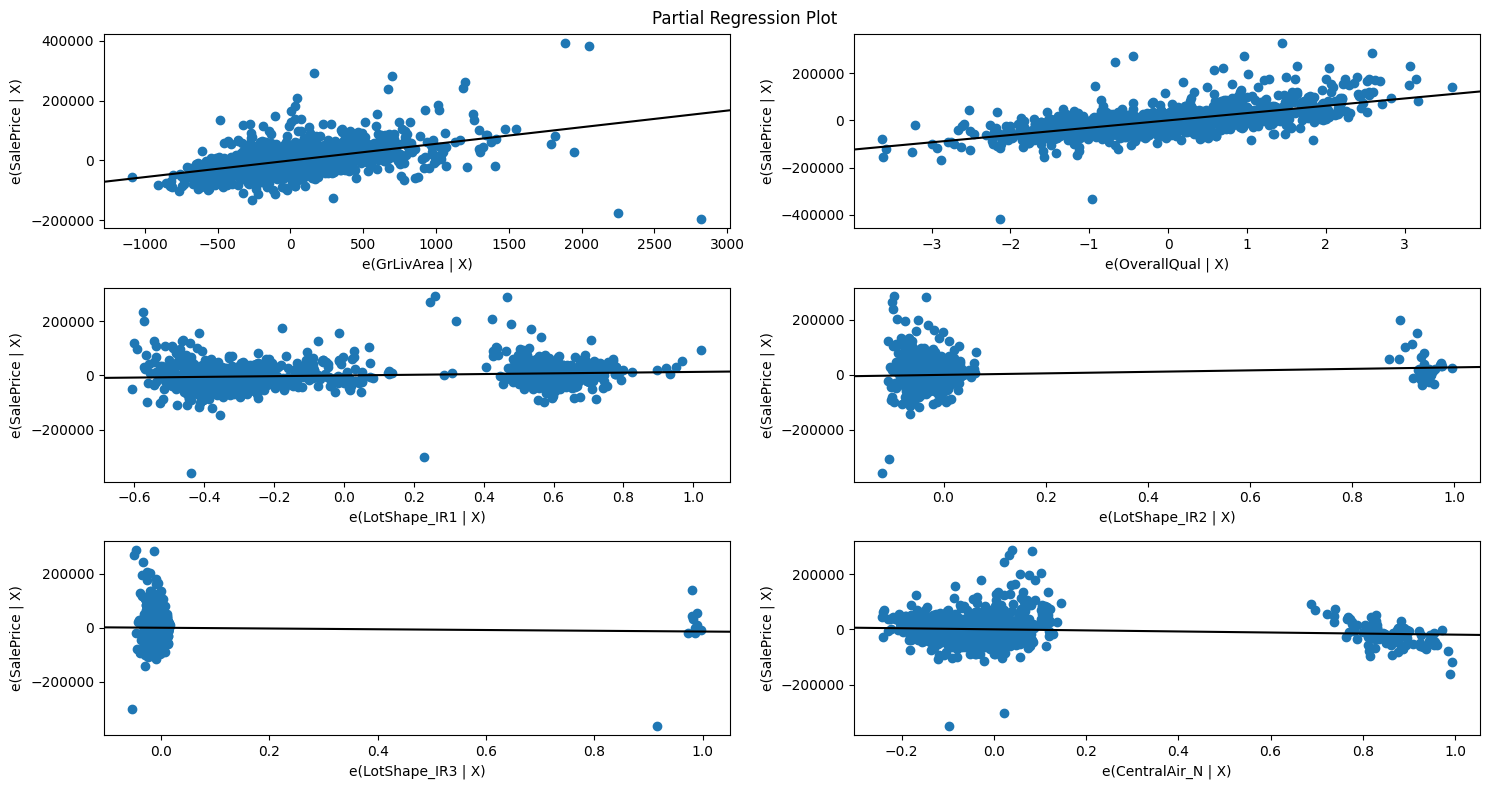

In [175]:
# Your code here - create partial regression plots
fig= plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(reg_results, exog_idx=['GrLivArea','OverallQual','LotShape_IR1','LotShape_IR2','LotShape_IR3','CentralAir_N'],fig=fig)
plt.show()


## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [187]:
# Your code here - calculate an error-based metric
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error


#use the model to get the y_predicted values
y_pred = reg_results.predict()
mae = mean_absolute_error(y, y_pred)
#rmse
rmse = np.sqrt(mean_squared_error(y,y_pred))

print(mae)
print(rmse)


28044.65906572825
41542.55012728397


## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

In [36]:
# Your answer here
"""
The RMSE is larger than the MAE, This means there are larger errors impacting the model's performance.RMSE is more sensitive to outliers as it squares
the differences.
"""



## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [213]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the features and target variable
X = cleaned_df[['GrLivArea', 'OverallQual', 'LotShape', 'CentralAir']]

# Get dummy variables for categorical columns
X_new = pd.get_dummies(X, columns=['LotShape', 'CentralAir'], dtype=int, drop_first=True)

# Define the target variable
y = cleaned_df['SalePrice']

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X_new, y)

# Make predictions
y_pred = model.predict(X_new)

# Calculate R-squared
r2_score = model.score(X_new, y)

# Calculate Adjusted R-squared
n = X_new.shape[0]  # Number of observations
p = X_new.shape[1]  # Number of features
adj_r2 = 1 - (1 - r2_score) * (n - 1) / (n - p - 1)

# Print metrics
print(f'R-squared: {r2_score}')
print(f'Adjusted R-squared: {adj_r2}')

# Optional: Calculate and print MAE and RMSE for additional model evaluation
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')


R-squared: 0.7263609763157584
Adjusted R-squared: 0.7252310147589067
Mean Absolute Error: 28044.659065728814
Root Mean Squared Error: 41542.550127283976


## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.